# The first part is the same as ex9, minor details changed

This part lays the foundation for taking the plotting/visualization a little further in the second part.

In [1]:
import pandas as pd

In [2]:
weather = pd.read_csv('20211012 weather report.csv').set_index('Unnamed: 0').T.dropna().T #note that I made sure to drop columns that did not have a report for all time periods.
weather.head()

,"{'name': 'Fjellet i Sør-Norge', 'id': '0710'}","{'name': 'Nordland', 'id': '0618'}","{'name': 'Troms', 'id': '0619'}","{'name': 'Spitsbergen', 'id': '3011'}"
Unnamed: 0,,,,
"{'from': '2021-10-12T18:00:00', 'to': '2021-10-13T00:00:00'}",Nordvestlig frisk bris utsatte steder. Spredte...,Nordvestlig frisk bris. Skyet eller delvis sky...,"Nordvestlig bris, periodevis liten kuling utsa...","Minkende vind, frisk bris til liten kuling fra..."
"{'from': '2021-10-13T00:00:00', 'to': '2021-10-14T00:00:00'}","Vestlig bris, om kvelden sørvestlig liten kuli...","Vest og nordvest bris, opp i frisk bris utsatt...","Vestlig bris, frisk bris utsatte steder, på ky...","Nordøst til øst frisk bris, liten til stiv kul..."
"{'from': '2021-10-14T00:00:00', 'to': '2021-10-15T00:00:00'}","Vestlig stiv kuling utsatte steder, torsdag kv...","Øst og nordøst frisk bris utsatte steder, fra ...","Bris av skiftende retning, til dels frisk bris...","Nord og nordøst liten kuling utsatte steder, o..."
"{'from': '2021-10-15T00:00:00', 'to': '2021-10-16T00:00:00'}","Vest til nordvest bris, frisk bris utsatte ste...","Skiftende bris, først på dagen periodevis fris...",Skiftende bris. Sludd eller snø i indre strøk ...,"Nord til nordøst periodevis frisk bris, på øst..."


In [3]:
columnNames = list(weather.columns)
strings = weather[columnNames[0]]

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk import word_tokenize

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sondrestromdahl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sondrestromdahl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
strings_token = [word_tokenize(item) for item in strings]

In [6]:
strings_words = [[word.lower() for word in item if word.isalnum()] for item in strings_token]
strings_words[0]

['nordvestlig',
 'frisk',
 'bris',
 'utsatte',
 'steder',
 'spredte',
 'snøbyger',
 'nord',
 'for',
 'finse',
 'ellers',
 'stort',
 'sett',
 'oppholdsvær',
 'og',
 'perioder',
 'med',
 'sol']

In [7]:
from collections import Counter

In [8]:
countList = [Counter(item) for item in strings_words]
for item in countList:
    print(dict(item.most_common(10)))
    print()

{'nordvestlig': 1, 'frisk': 1, 'bris': 1, 'utsatte': 1, 'steder': 1, 'spredte': 1, 'snøbyger': 1, 'nord': 1, 'for': 1, 'finse': 1}

{'om': 2, 'kvelden': 2, 'eller': 2, 'fra': 2, 'vestlig': 1, 'bris': 1, 'sørvestlig': 1, 'liten': 1, 'kuling': 1, 'tilskyende': 1}

{'torsdag': 2, 'kveld': 2, 'vestlig': 1, 'stiv': 1, 'kuling': 1, 'utsatte': 1, 'steder': 1, 'dreiende': 1, 'nordlig': 1, 'i': 1}

{'bris': 2, 'vest': 1, 'til': 1, 'nordvest': 1, 'frisk': 1, 'utsatte': 1, 'steder': 1, 'sludd': 1, 'eller': 1, 'snø': 1}



# The second part consist of visualization to gain knowledge based only on simple preprocessing

## Idea of a quick activity for those who wish to implement something with the easy preprocessing tools we already have learned
Suppose you have collected a list of words associated with "bad weather" - 'badWeatherIndicator', and you want to use the occurrence of these words in the weather report cells as an indicator for "bad weather". You can iterate through all your columns and create a function/code that counts the occurence of words in the "badWeatherIndicator", creating a new row or column to hold that count. Then you can visualize the level of bad weather across the dataframe for the various regions. 

When we get to Bag of Words and Term-Frequency - Inverse Document Frequency (TF-IDF), you will certainly have more tools at your disposal to conduct analyses based on text. My point with this simple implementation suggestion is that already with some basic string processing, matching and counting operations, you can actually use the computer to generate insight from textual input.

In the cell below, I collected some words indicative of bad weather in the list 'badWeatherIndicator'.

In [9]:
badWeatherIndicator = ['regnbyger', 'kuling', 'snøbyger','sluddbyer','sluddbyger','bris']

In [10]:
badWeather = []
for item in strings_words:    
    itemIndicator = 0
    for indicator in badWeatherIndicator:
        if indicator in item:
            itemIndicator += 1
    badWeather.append(itemIndicator)

In [11]:
badWeather

[2, 4, 2, 1]

In [12]:
dict(zip(weather.index,badWeather))

{"{'from': '2021-10-12T18:00:00', 'to': '2021-10-13T00:00:00'}": 2,
 "{'from': '2021-10-13T00:00:00', 'to': '2021-10-14T00:00:00'}": 4,
 "{'from': '2021-10-14T00:00:00', 'to': '2021-10-15T00:00:00'}": 2,
 "{'from': '2021-10-15T00:00:00', 'to': '2021-10-16T00:00:00'}": 1}

In [13]:
pd.DataFrame(dict(zip(weather.index,badWeather)), index=['badWeatherIndicator'])

,"{'from': '2021-10-12T18:00:00', 'to': '2021-10-13T00:00:00'}","{'from': '2021-10-13T00:00:00', 'to': '2021-10-14T00:00:00'}","{'from': '2021-10-14T00:00:00', 'to': '2021-10-15T00:00:00'}","{'from': '2021-10-15T00:00:00', 'to': '2021-10-16T00:00:00'}"
badWeatherIndicator,2,4,2,1


In [14]:
badWeatherDF = pd.DataFrame(dict(zip(weather.index,badWeather)),index=["badWeatherIndicator"]).T

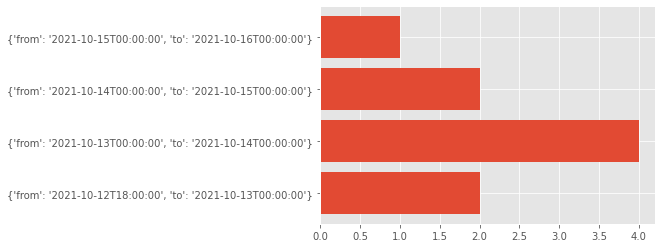

In [15]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
plt.barh(badWeatherDF.index,badWeatherDF.badWeatherIndicator)
plt.show()

## In the following, the visualization model is expanded to graph the weather reports for all regions in the data

In [16]:
#here's an implementation of this scheme for one column only (strings_words), 
#presenting the "level of bad weather" as function of the time period. 

badWeather = []
for item in strings_words:    
    itemIndicator = 0
    for indicator in badWeatherIndicator:
        if indicator in item:
            itemIndicator += 1
    badWeather.append(itemIndicator)

badWeatherDF = pd.DataFrame(dict(zip(weather.index,badWeather)),index=["badWeatherIndicator"]).T


In [17]:
columnNames = list(weather.columns)
report1 = weather[columnNames[0]]

In [18]:
def preprocessing(strings):
    """taking a list of strings, doing preprocessing, returning a list of list of words"""
    from nltk import word_tokenize
    strings = [word_tokenize(item) for item in strings]
    strings = [ [word.lower() for word in item if word.isalnum()] 
               for item in strings]
    
    return strings

In [19]:
#example of how to use the above function
columnNames = list(weather.columns)
report1 = weather[columnNames[0]]
results = preprocessing(report1)

In [20]:
def indicatorCount(strings, indicators):
    """taking list of list of words (strings), as well as a list of indicator words, 
    returning a DataFrame with the counts of the total occurrence of indicators in each string"""
    indiCounts = []
    for item in strings:
        itemIndicator = 0
        for indicator in indicators:
            if indicator in item:
                itemIndicator += 1
        indiCounts.append(itemIndicator)
    indiCountsDF = pd.DataFrame(dict(zip(weather.index,indiCounts)), index=['Indicator']).T
    return indiCountsDF


In [21]:
weatherReports = weather.columns
weatherReports

Index(['{'name': 'Fjellet i Sør-Norge', 'id': '0710'}',
       '{'name': 'Nordland', 'id': '0618'}', '{'name': 'Troms', 'id': '0619'}',
       '{'name': 'Spitsbergen', 'id': '3011'}'],
      dtype='object')

In [22]:
badWeatherDF = pd.DataFrame(columns = weather.columns, index = weather.index)

In [23]:
for region in weatherReports:
    reportProcessed = preprocessing(weather[region])
    badWeatherDF[region] = indicatorCount(reportProcessed, badWeatherIndicator)
badWeatherDF

,"{'name': 'Fjellet i Sør-Norge', 'id': '0710'}","{'name': 'Nordland', 'id': '0618'}","{'name': 'Troms', 'id': '0619'}","{'name': 'Spitsbergen', 'id': '3011'}"
Unnamed: 0,,,,
"{'from': '2021-10-12T18:00:00', 'to': '2021-10-13T00:00:00'}",2,3,4,2
"{'from': '2021-10-13T00:00:00', 'to': '2021-10-14T00:00:00'}",4,4,5,2
"{'from': '2021-10-14T00:00:00', 'to': '2021-10-15T00:00:00'}",2,2,2,2
"{'from': '2021-10-15T00:00:00', 'to': '2021-10-16T00:00:00'}",1,2,2,2


In [24]:
badWeatherDF.index[0][10:20]

'2021-10-12'

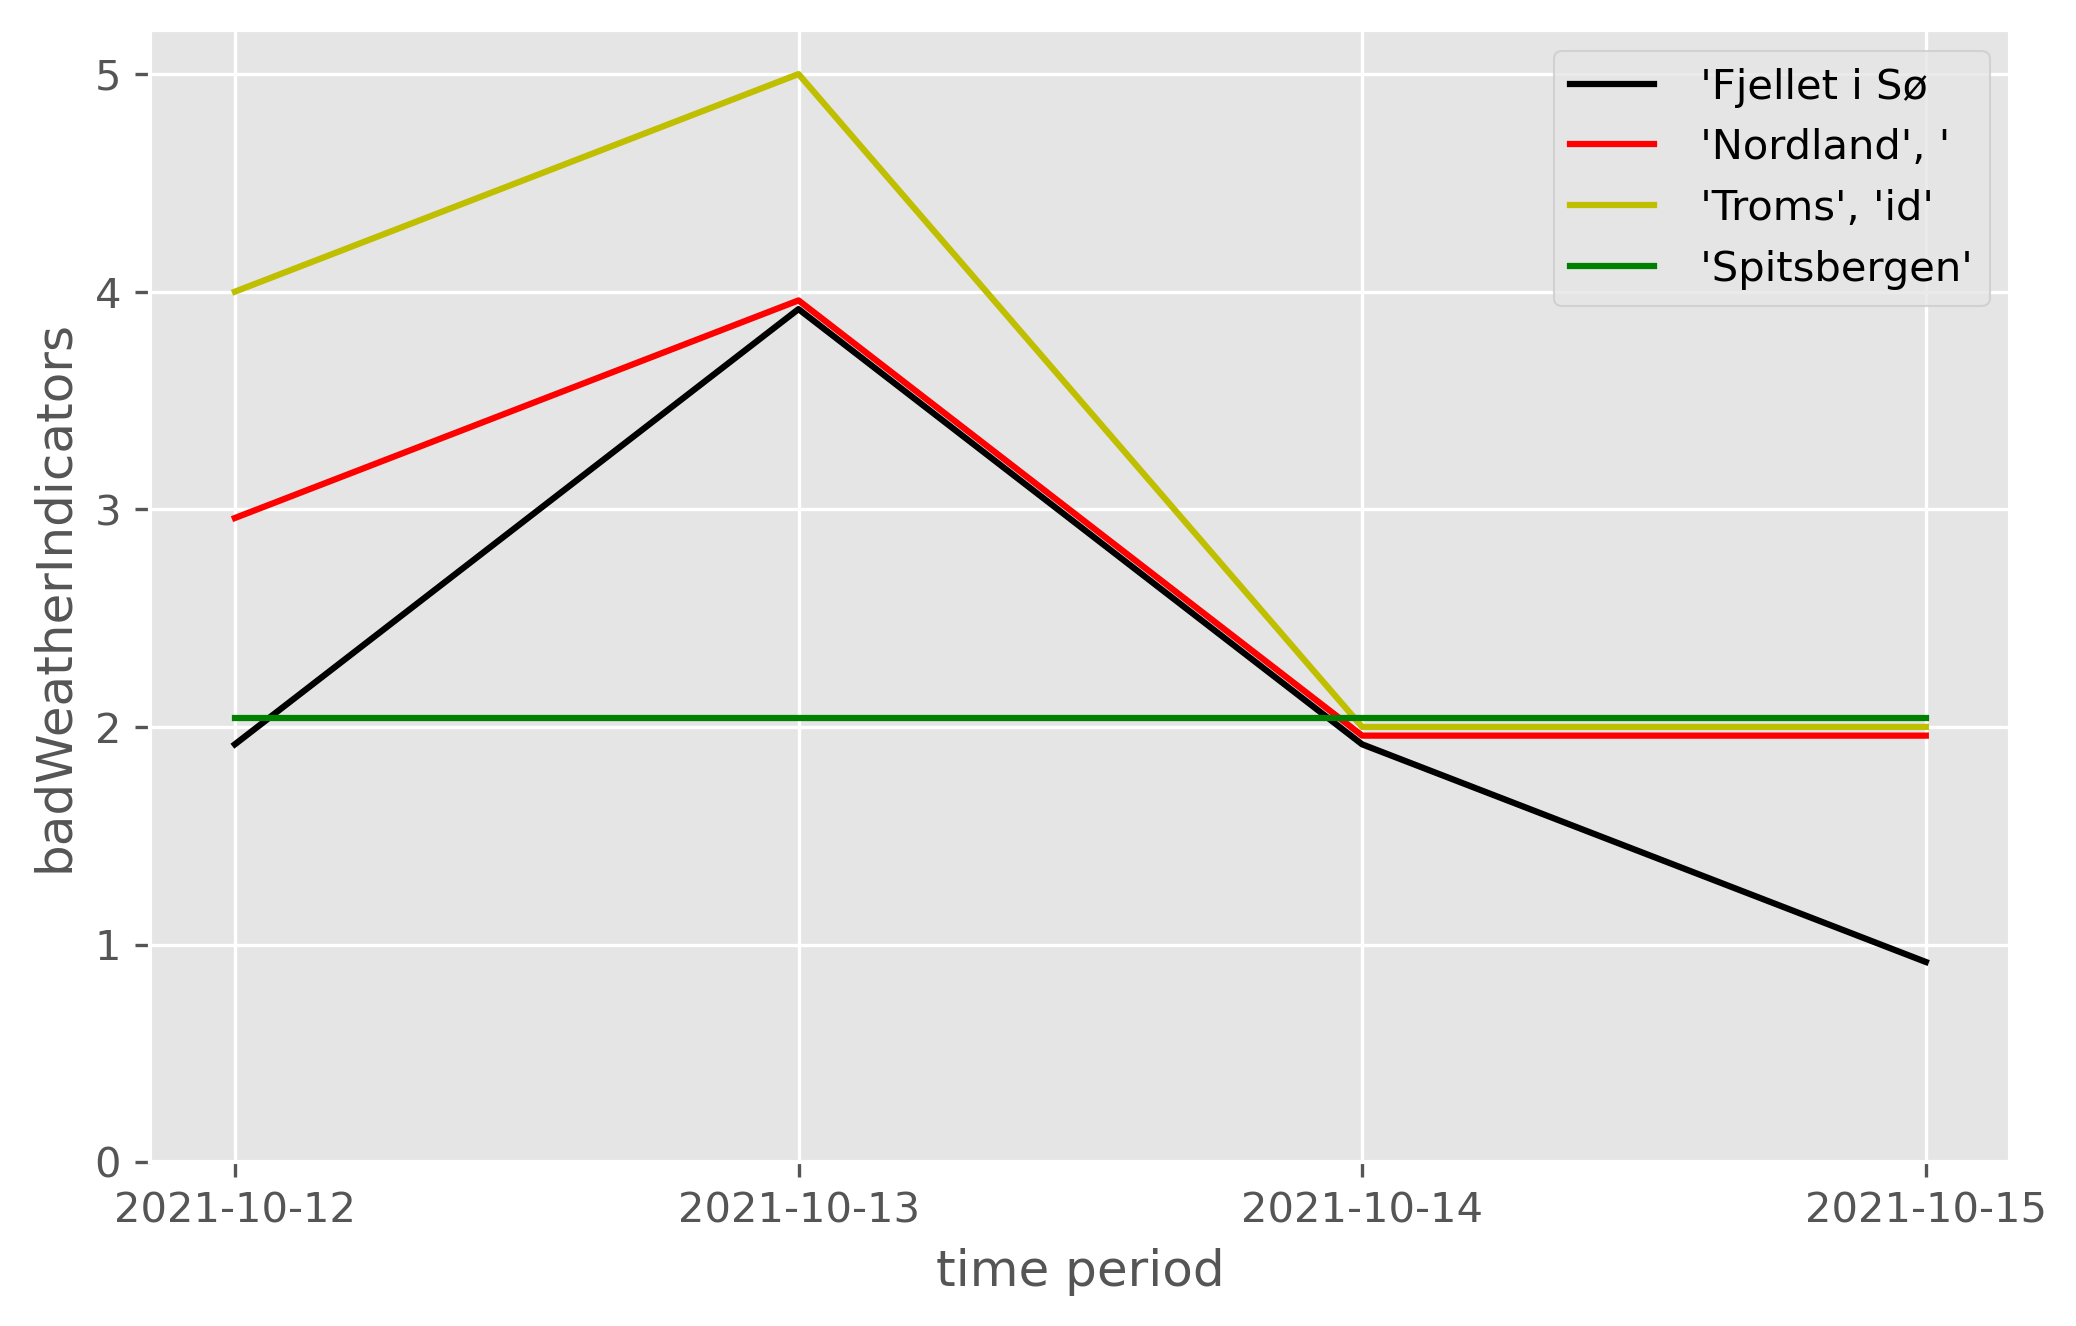

In [25]:
fig, allGraphs = plt.subplots(figsize=(8,5), dpi=300)
import matplotlib.lines as mlines

colors=['k','r','y','g']
legends = []

no = 0
offsets = [item/25 for item in list(range(-len(badWeatherDF)//2, len(badWeatherDF)//2))]
for region in badWeatherDF.columns:
    allGraphs.plot(badWeatherDF[region] + offsets[no], color = colors[no])
    legends.append(mlines.Line2D([],[], color = colors[no], label=badWeatherDF.columns[no][8:22]))
    no += 1
    
allGraphs.set_ylim(0,)    
allGraphs.set_xlabel('time period') 
allGraphs.set_ylabel('badWeatherIndicators')

allGraphs.legend(handles=legends)                   
                   
allGraphs.set_xticks(range(len(weather.index)))
allGraphs.set_xticklabels([period[10:20] for period in badWeatherDF.index])


plt.show()

# In the third part, the already created function for preprocessing is further refined, and used on new sample data
Note that preprocessing2() contains removal of stopwords as well as tokenization, convert to lowercase and remove non-alphanumerical words.

In [26]:
def preprocessing2(strings):
    """taking a list of strings, doing preprocessing, returning a list of list of words"""
    from nltk import word_tokenize
    import nltk
    stop_words = nltk.corpus.stopwords.words('english')
    
    strings = [word_tokenize(item) for item in strings]
    strings = [ [word.lower() for word in item if word.isalnum() and word not in stop_words] for item in strings]
    #strings = [ [word.lower() for word in item if word.isalnum()] for item in strings]
    
    return strings

In [27]:
newsItems = pd.read_csv('2021-10-13 News items on big data.csv')

In [28]:
newsItems.head()

,string,date,url,author,source
0,"Today’s Hottest Deals: BIG Board Game Sale, Sa...",2021-10-04T12:13:11Z,https://www.geeksaresexy.net/2021/10/04/todays...,Geeks are Sexy,"{'id': None, 'name': 'Geeksaresexy.net'}"
1,Big Tech + Big Data = Big Problems – The Oxfor...,2021-10-01T13:00:17Z,https://www.oxfordstudent.com/2021/10/01/big-t...,NaN,"{'id': None, 'name': 'Oxfordstudent.com'}"
2,The 7 Best Big Data App Development Services i...,2021-10-08T10:09:33Z,https://visual.ly/community/Infographics/busin...,content14,"{'id': None, 'name': 'Visual.ly'}"
3,A proteomics sample metadata representation fo...,2021-10-06T00:00:00Z,https://www.nature.com/articles/s41467-021-261...,"Chengxin Dai, Anja Füllgrabe, Julianus Pfeuffe...","{'id': None, 'name': 'Nature.com'}"
4,How Disneyland uses big data to power the new ...,2021-10-12T17:45:55Z,https://www.sbsun.com/2021/10/12/how-disneylan...,Brady MacDonald,"{'id': None, 'name': 'San Bernardino County Sun'}"


In [29]:
newsItems.string

0     Today’s Hottest Deals: BIG Board Game Sale, Sa...
1     Big Tech + Big Data = Big Problems – The Oxfor...
2     The 7 Best Big Data App Development Services i...
3     A proteomics sample metadata representation fo...
4     How Disneyland uses big data to power the new ...
5     Advertise.com CEO, Daniel Yomtobian, Explains ...
6     Big banks kick off Q3 earnings season, CPI inf...
7     Pioneering Big Earth Data: Join the CEO and CF...
8     What’s new with SQL Server Big Data Clusters—C...
9     Bitcoin eyes big $58K resistance as new data s...
10    Samsung Foundry Innovations Power the Future o...
11    Samsung Foundry Innovations Power the Future o...
12    IT Services Market to Record $ 478.39 Bn Growt...
13    Artificial Intelligence (AI) and Big Data Anal...
14    Big Data Versus Granular Insights — Tom Wells ...
15    Samsung Foundry Innovations Power the Future o...
16    Dave Eggers on His Fight Against Big Data: Hos...
17    Azure Data Lake Storage - Setup For Big Da

In [30]:
strings_processed = preprocessing2(newsItems.string) 
strings_processed

[['today',
  'hottest',
  'deals',
  'big',
  'board',
  'game',
  'sale',
  'save',
  'big',
  'data',
  'storage',
  'memory',
  'cards',
  'ssds',
  'hard',
  'drives',
  'etc',
  'beats',
  'studio3',
  'wireless',
  'headphones',
  'more',
  'for',
  'today',
  'edition',
  'deal',
  'day',
  'best',
  'deals',
  'stumbled',
  'browsing',
  'web',
  'morning',
  'please',
  'note',
  'geeks',
  'sexy',
  'might',
  'get',
  'small',
  'commission',
  'qualifying',
  'purchases',
  'done',
  'posts',
  'amazon',
  'for',
  'todays',
  'edition',
  'deal',
  'day',
  'best',
  'deals',
  'stumbled',
  'browsing',
  'web',
  'morning',
  'please',
  'note',
  'geeks',
  'sexy',
  'might',
  'get',
  'small',
  'commission',
  'chars'],
 ['big',
  'tech',
  'big',
  'data',
  'big',
  'problems',
  'the',
  'oxford',
  'student',
  'oxford',
  'student',
  'elias',
  'formaggia',
  'discusses',
  'worries',
  'concerning',
  'big',
  'tech',
  'use',
  'consumer',
  'data',
  'implica